# __Simple linear regression 1 input, 1 output__
Trong ví dụ này, chúng ta sẽ thực hiện một ví dụ về hồi quy tuyến tính đơn giản với một biến đầu vào và một biến đầu ra. Đầu tiên, chúng ta sẽ tạo một tập dữ liệu mẫu với một biến đầu vào và một biến đầu ra. Sau đó, chúng ta sẽ thực hiện một hồi quy tuyến tính đơn giản trên tập dữ liệu này.
Đầu vào được sinh ngẫu nhiên, đầu ra được tính theo công thức sau:
$$y = 2x + 3 + \epsilon$$
Trong đó, $\epsilon$ là một nhiễu được sinh ngẫu nhiên với phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng 0.2.
Mô hình hồi quy tuyến tính đơn giản sẽ có dạng sau:
$$y = Wx + b$$
Trong đó, $W$ là trọng số và $b$ là hệ số điều chỉnh. Sau khi hồi quy, nếu W xấp xỉ 2 và b xấp xỉ 3, thì mô hình hồi quy tuyến tính đơn giản đã được huấn luyện tốt.
Để huấn luyện mô hình, ta dùng hàm mất mát MSE (Mean Squared Error) và thuật toán tối ưu hóa là Gradient Descent.
Hàm mất mát MSE được tính theo công thức sau:
$$MSE = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)^2$$
Trong đó $N$ là số lượng mẫu, $y_i$ là giá trị thực tế của biến đầu ra, $\hat{y}_i$ là giá trị dự đoán của biến đầu ra.
Thuật toán Gradient Descent áp dụng để cập nhật W, b được thực hiện như sau:
$$W = W - \alpha \frac{\partial MSE}{\partial W}$$
$$b = b - \alpha \frac{\partial MSE}{\partial b}$$
Trong đó, $\alpha$ là tốc độ học (learning rate).
Tính đạo hàm của hàm mất mát MSE theo $W$ và $b$ ta được:
$$\frac{\partial MSE}{\partial W} = \frac{2}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)(x_i)$$
$$\frac{\partial MSE}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)(1)$$

Kết hợp lại ta được thuật toán Gradient Descent như sau:
$$W = W - \alpha \frac{2}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)(x_i)$$
$$b = b - \alpha \frac{2}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)$$
Ta sẽ cập nhật W, b theo công thức trên cho đến khi hàm mất mát MSE đạt giá trị nhỏ nhất mong muốn hoặc sau 1 số lần lặp tối đa.

In [1]:
import numpy as np

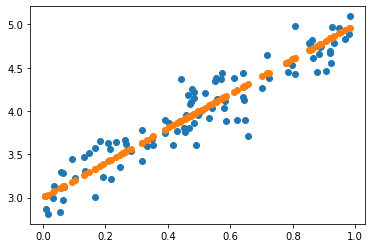

(100,)
(100,)
(100,)


In [39]:
# Generate X vector of 100 random numbers between 0 and 1
N_OBSERVATIONS = 100
X = np.random.rand(N_OBSERVATIONS)
targets = 2 * X + 3
actuals = targets + np.random.normal(0, 0.2, 100)

# Plot X and actuals
import matplotlib.pyplot as plt
plt.scatter(X, actuals)
# Plot X and targets
plt.scatter(X, targets)
plt.show()
print(X.shape)
print(targets.shape)
print(actuals.shape)

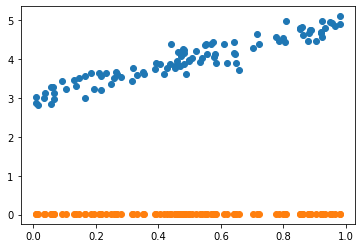

(100,)


In [40]:
# Initialize the weights and biases randomly in some small initial range.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1
W = np.random.uniform(-init_range, init_range, size=1)
b = np.random.uniform(-init_range, init_range, size=1)

# Plot initial predictions
predictions = W * X + b
plt.scatter(X, actuals)
plt.scatter(X, predictions)
plt.show()

print(predictions.shape)

In [41]:
# Train the model
LEARNING_RATE = 0.005
EPOCHS = 500
for epoch in range(EPOCHS):
    # Calculate the predictions
    predictions = W * X + b

    # Calculate the error
    error = predictions - actuals

    # Calculate the mean squared error (loss function)
    mse = np.mean(error ** 2)

    # Optimize algorithm: Update the weights and biases by subtracting the gradient
    W -= LEARNING_RATE * 2 * np.mean(error * X)
    b -= LEARNING_RATE * 2 * np.mean(error)

    # Print the mean squared error every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")

Epoch 0: MSE = 16.048667101445837
Epoch 10: MSE = 12.45296127067704
Epoch 20: MSE = 9.664839168141803
Epoch 30: MSE = 7.502917721565674
Epoch 40: MSE = 5.826552474971862
Epoch 50: MSE = 4.526687699954766
Epoch 60: MSE = 3.5187615709570297
Epoch 70: MSE = 2.737204837400478
Epoch 80: MSE = 2.131175093452404
Epoch 90: MSE = 1.6612491303339456
Epoch 100: MSE = 1.2968581859367074
Epoch 110: MSE = 1.0142992370937725
Epoch 120: MSE = 0.7951929553881029
Epoch 130: MSE = 0.6252880059168867
Epoch 140: MSE = 0.4935339004219251
Epoch 150: MSE = 0.39136208750491763
Epoch 160: MSE = 0.3121285099012493
Epoch 170: MSE = 0.2506813633286481
Epoch 180: MSE = 0.2030259366507493
Epoch 190: MSE = 0.1660647289028909
Epoch 200: MSE = 0.13739593600514952
Epoch 210: MSE = 0.11515719733727303
Epoch 220: MSE = 0.09790443681549439
Epoch 230: MSE = 0.08451791624996034
Epoch 240: MSE = 0.07412938910753936
Epoch 250: MSE = 0.0660656155312781
Epoch 260: MSE = 0.059804563880059725
Epoch 270: MSE = 0.0549414493974269
Ep

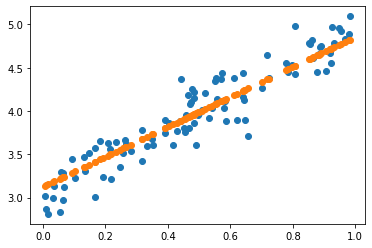

In [42]:
# Plot the final predictions
predictions = W * X + b
plt.scatter(X, actuals)
plt.scatter(X, predictions)
plt.show()

In [43]:
# Print the final weights and biases
print(f"W = {W}, b = {b}")

W = [1.731869], b = [3.12383398]
